In [1]:
import xgboost
import numpy as np
import pandas as pd

In [2]:
from pandas import read_csv
from matplotlib import pyplot

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression

In [3]:
# training the model on the existing data

In [4]:
url = "datasets/nourishment_data.csv"
dataframe = read_csv(url, header=None)
data = dataframe.values

print(dataframe.shape)
# print(dataframe.head())

(1871, 61)


In [5]:
'''
# Poverty Data
X = data[1:, 6:]
y = data[1:, 5]

X = np.delete(X, 50, 1)
X = np.delete(X, 50, 1)
X = np.delete(X, 50, 1)
X = np.delete(X, [13, 15], 1)
X = np.delete(X, [28, 33], 1)
X = np.delete(X, 1, 1)
X = np.delete(X, 1, 1)

print(X)
# removing percentage sign 
for i in range(y.size):
    new_str = (y[i])[:-1]
    y[i] = new_str
'''

# Nourishment Data:
X = data[1:, 12:]
y = data[1:, 5]

X = np.delete(X, [5, 7], 1)

for i in range(y.size):
    if (y[i]) == '<2.5':
        y[i] = 1.0


In [10]:
# split into training and testing data
seed = 10
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(X_train)

[['10470921.0' '0.435' '1.002' ... '398.7011' '2.5591' '155799.0']
 ['3033998.0' '0.436' '1.487' ... nan nan nan]
 ['1215677.0' '0.292' '0.575' ... nan nan nan]
 ...
 ['5461411.0' '0.987' '2.609' ... nan nan nan]
 ['34663603.0' '0.483' '1.256' ... '196.6482' '3.1067' '63298.0']
 ['10586533.0' nan '0.806' ... nan nan nan]]


In [11]:
model = XGBRegressor()
model.fit(X_train, y_train)

# print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# make predictions for test data
y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# evaluate predictions
error = mean_squared_error(y_test, y_pred)
print(error)

3.8466120681432048


<Figure size 432x288 with 0 Axes>

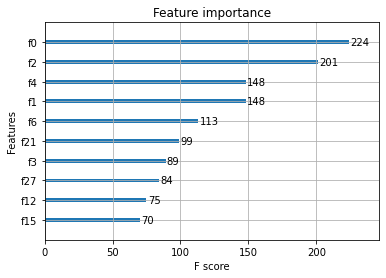

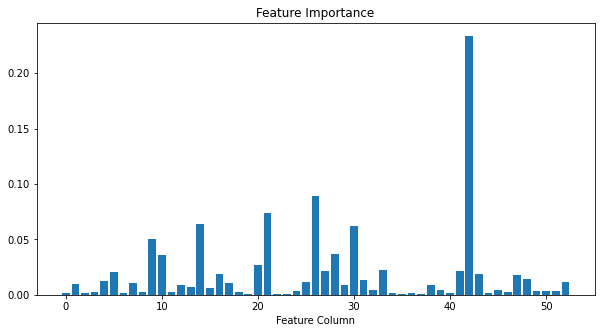

In [76]:
# explainability

# plot importance of features based on fitted trees
pyplot.figure()
xgboost.plot_importance(model, max_num_features=10)

pyplot.figure(figsize=[10, 5])
csfont = {'fontname':'Helvetica'}

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.title('Feature Importance',**csfont)
pyplot.xlabel('Feature Column', **csfont)
pyplot.savefig('nourish.png')
pyplot.show()


In [ ]:
# using the model to predict new values on new data

In [19]:
model=XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# new data

new_data = X[1038, :]
for i in [12, 39, 42]:
    if not pd.isnull(new_data[i]):
        new_data[i]=str(float(new_data[i])*1.05)
    else:
        new_data[i] = new_data[i]
new_data = np.asarray([new_data])
yhat = model.predict(new_data)
print('Predicted: %.3f' % yhat)

Predicted: 28.629
